In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import networkx as nx
import numpy as np

from flatland.core.graph.graph_rendering import get_positions, add_flatland_styling
from flatland.core.graph.graph_simplification import DecisionPointGraph
from flatland.core.graph.grid_to_graph import GraphTransitionMap
from flatland.envs.rail_env_utils import env_creator
from flatland.core.grid.rail_env_grid import RailEnvTransitions, RailEnvTransitionsEnum
from flatland.core.transition_map import GridTransitionMap
from flatland.utils.graphics_pil import PILSVG

In [3]:
mpl.rcParams['figure.max_open_warning'] = 0

# Flatland Graph Demo
This notebook illustrates the directed graph representation of Flatland.

### Create env

In [4]:
env = env_creator()

/Users/che/workspaces/flatland-rl/flatland/envs/rail_generators.py:303: UserWarning: Could not set all required cities! Created 1/2
  warnings.warn(city_warning)
/Users/che/workspaces/flatland-rl/flatland/envs/rail_generators.py:215: UserWarning: [WARNING] Changing to Grid mode to place at least 2 cities.
  warnings.warn("[WARNING] Changing to Grid mode to place at least 2 cities.")


### Transform to directed graph and simplify

In [5]:
micro = GraphTransitionMap.grid_to_digraph(env.rail)
gtm = GraphTransitionMap(micro)
decision_point_graph = DecisionPointGraph.fromGraphTransitionMap(gtm)
collapsed = decision_point_graph.g

### Render both

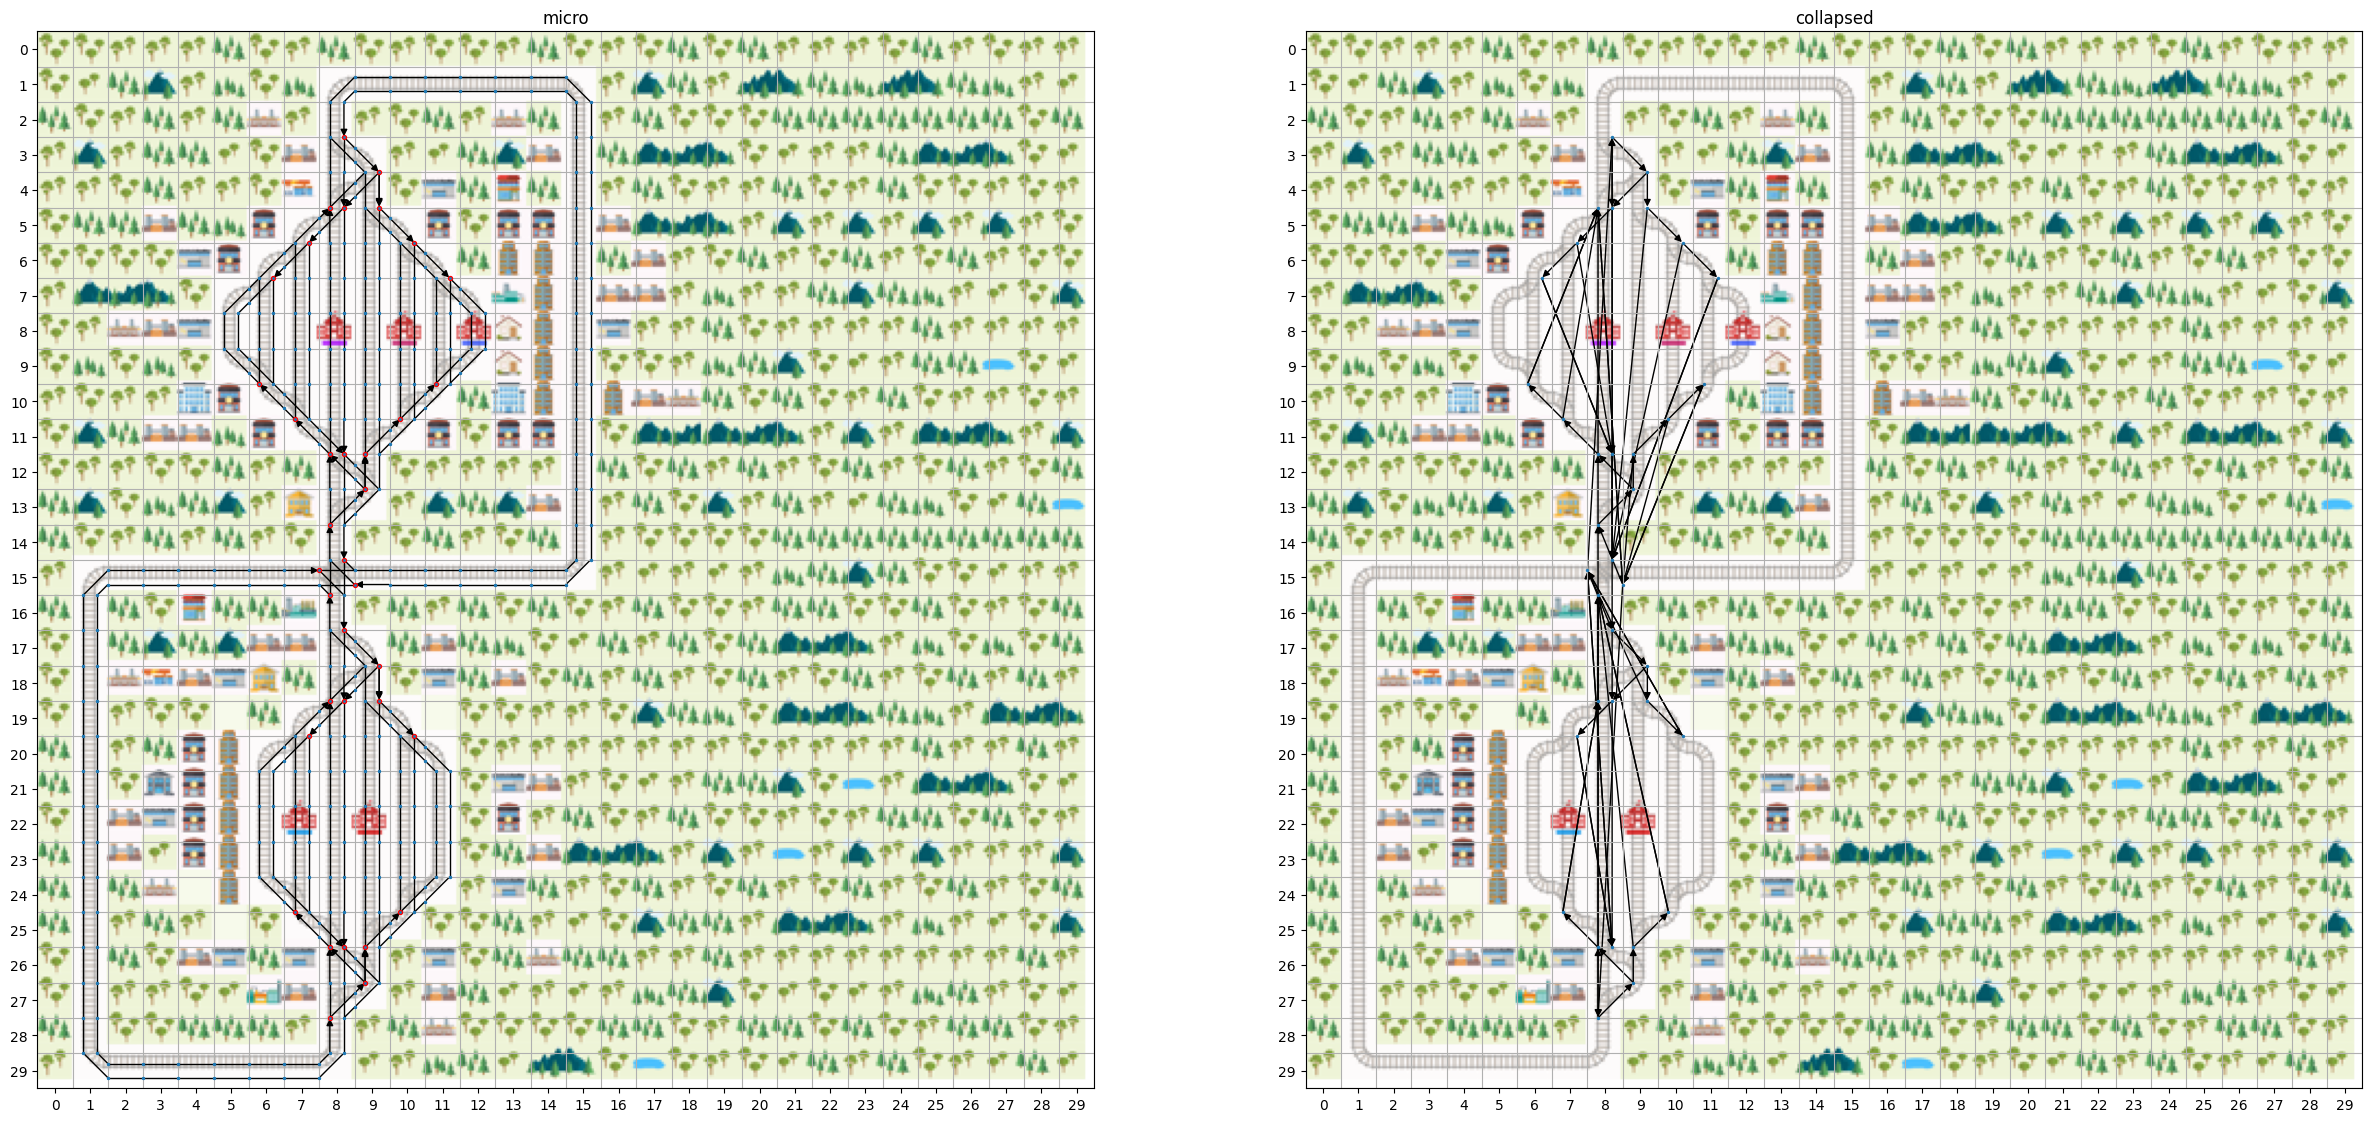

In [6]:
fig, axs = plt.subplots(1, 2)
micro1 = nx.subgraph_view(micro, filter_edge=lambda u, v: len(list(micro.successors(v))) == 1)
nx.draw_networkx(micro1,
                 pos=get_positions(micro1),
                 ax=axs[0],
                 node_size=2,
                 with_labels=False,
                 arrows=False
                 )
micro2 = nx.subgraph_view(micro, filter_node=lambda v: len(list(micro.successors(v))) == 2)
nx.draw_networkx(micro2,
                 pos=get_positions(micro2),
                 ax=axs[0],
                 node_size=8,
                 node_color="red",
                 with_labels=False,
                 )
micro3 = nx.subgraph_view(micro, filter_edge=lambda u, v: len(list(micro.successors(v))) == 2)
nx.draw_networkx(micro3,
                 pos=get_positions(micro3),
                 ax=axs[0],
                 arrows=True,
                 node_size=1,
                 with_labels=False
                 )

nx.draw_networkx(collapsed,
                 pos=get_positions(collapsed),
                 ax=axs[1],
                 node_size=2,
                 with_labels=False
                 )
add_flatland_styling(env, axs[1])
add_flatland_styling(env, axs[0])

axs[0].set_title('micro')
axs[1].set_title('collapsed')

fig.set_size_inches(30,15)
# fig.savefig('graph_demo.png', dpi=100)

### Deep Dive Basic Railway Elements

In [7]:
pil = PILSVG(1,1)

In [8]:
assert len(set([e.value for e in RailEnvTransitionsEnum])) == 30

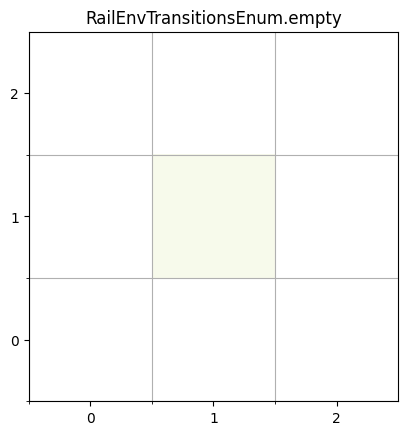

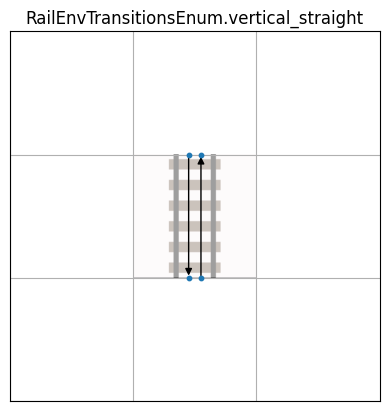

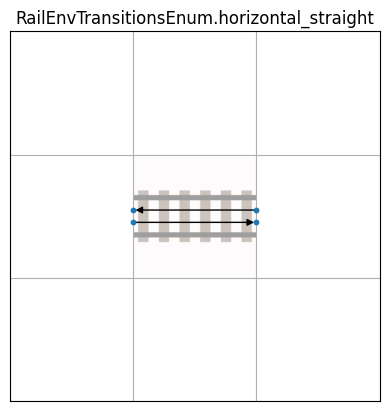

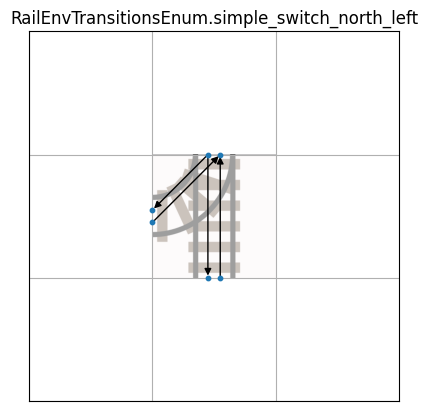

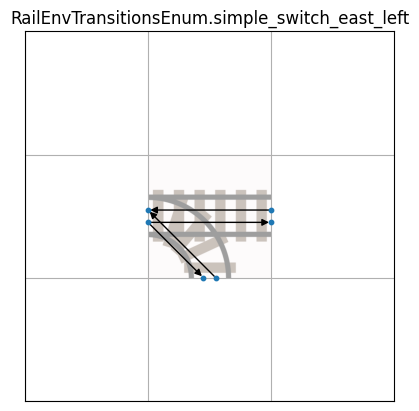

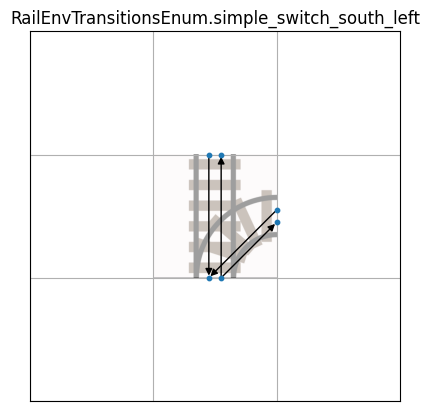

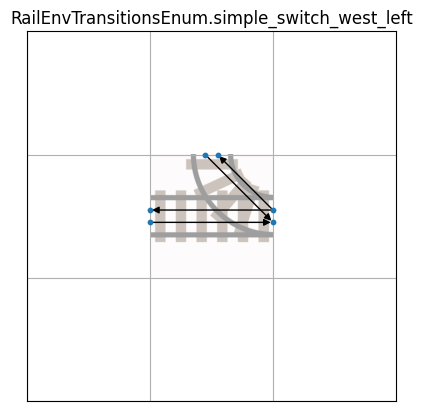

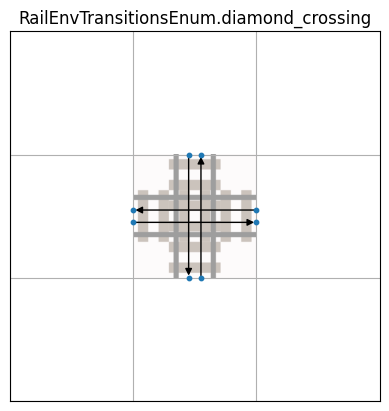

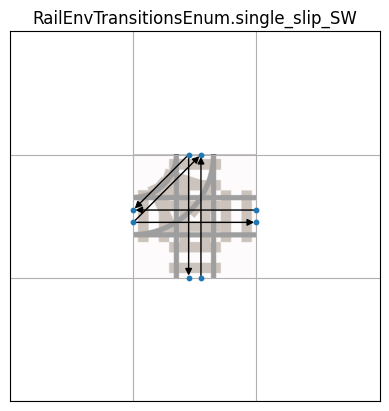

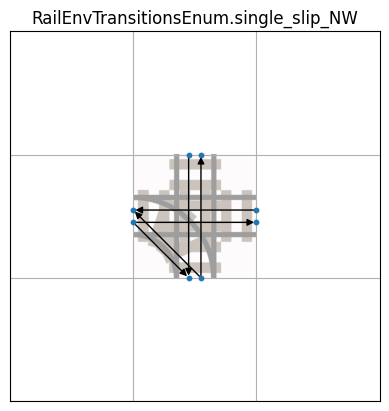

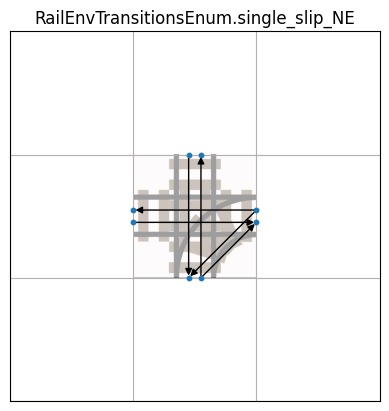

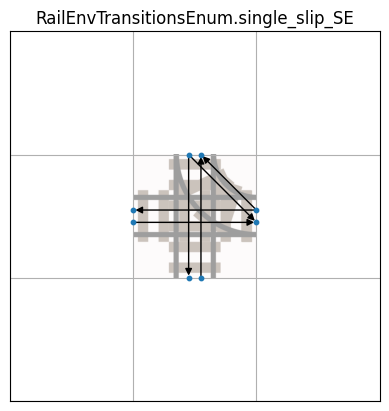

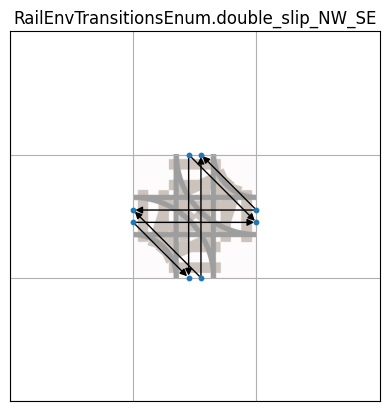

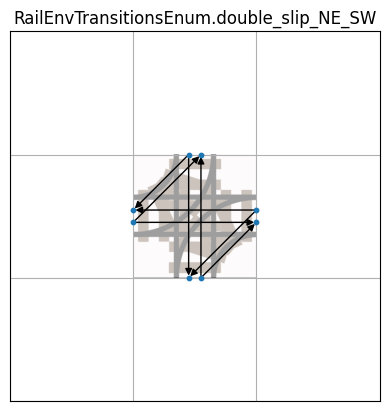

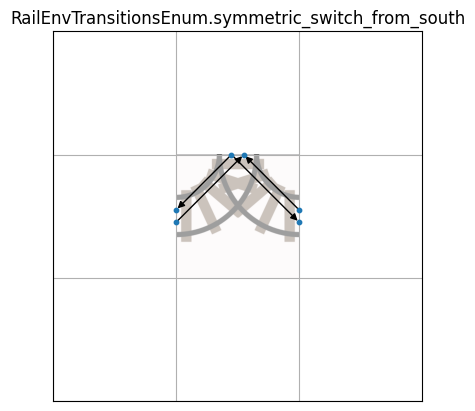

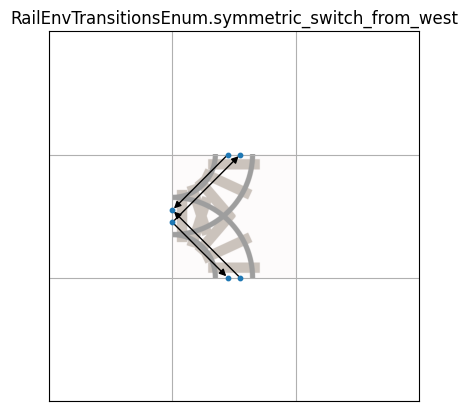

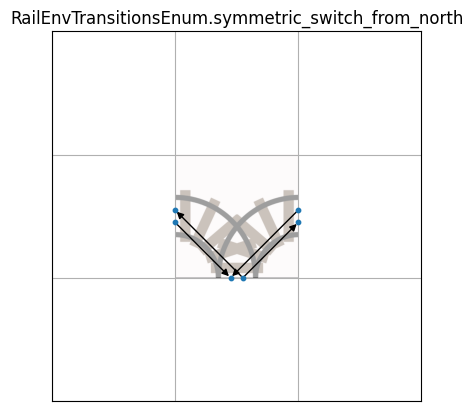

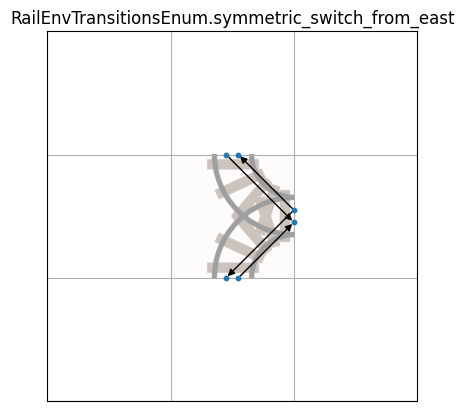

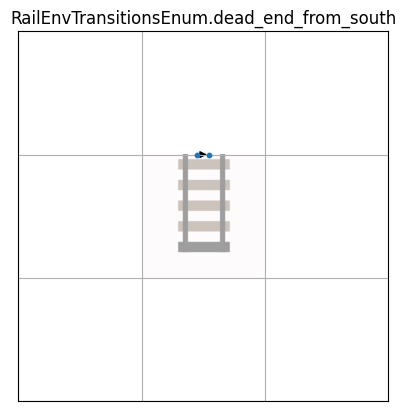

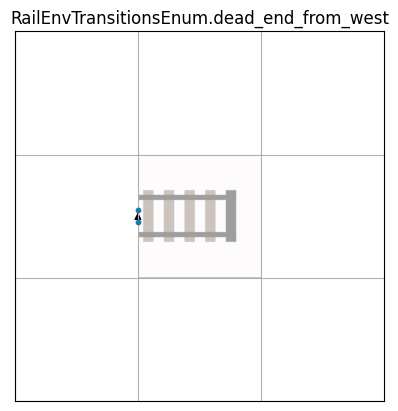

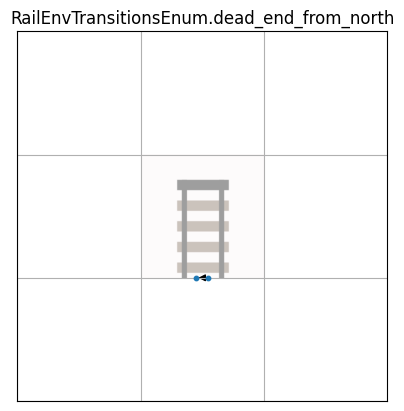

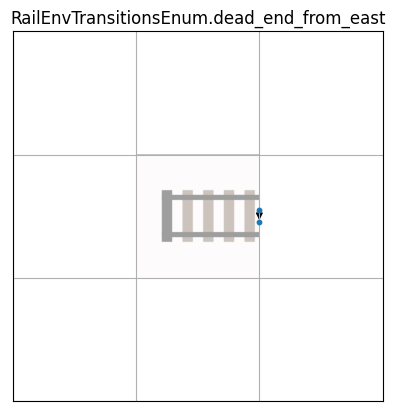

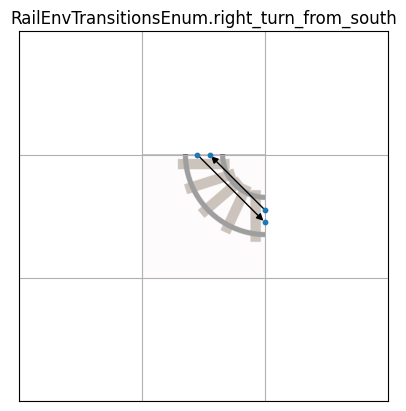

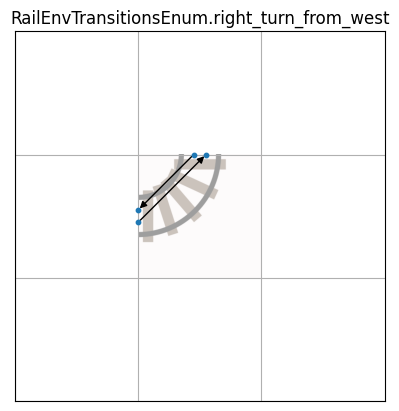

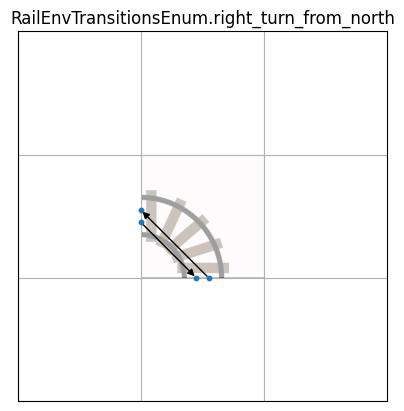

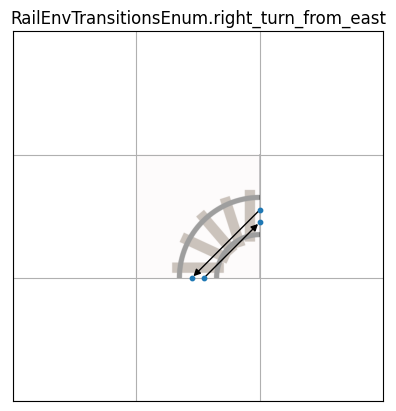

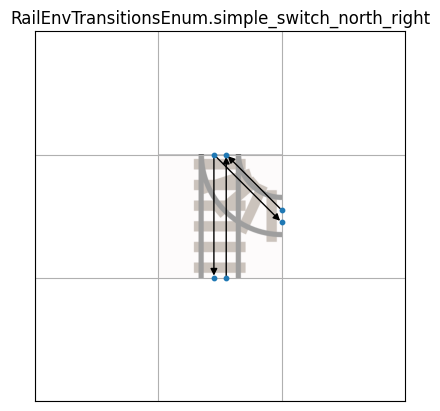

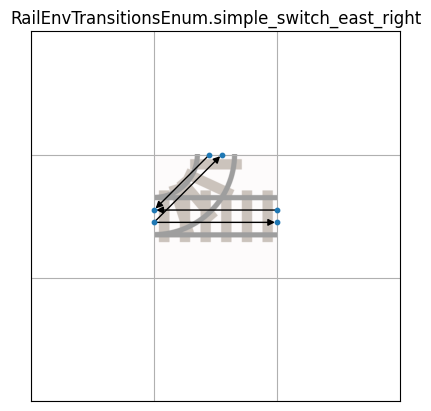

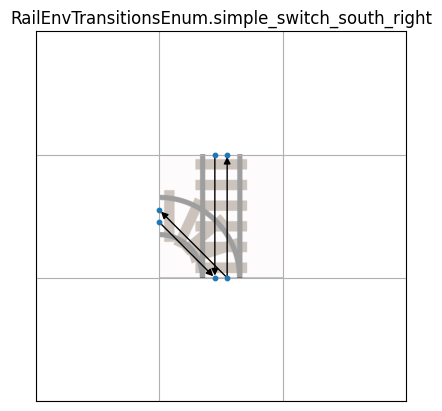

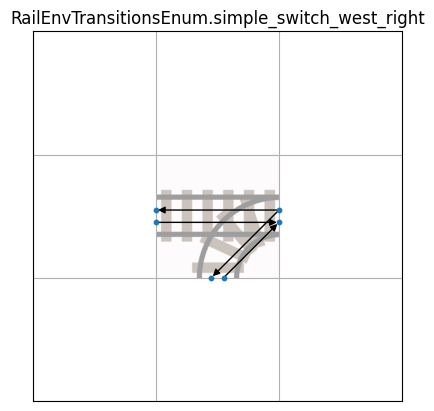

In [9]:
for i, e in enumerate(RailEnvTransitionsEnum):
    transition = e.value

    fig, axs = plt.subplots(1)
    # use 3 x 3 not to go -1
    rail_map = np.array(
        [[RailEnvTransitionsEnum.empty] * 3] +
        [[RailEnvTransitionsEnum.empty, transition, RailEnvTransitionsEnum.empty]] +
        [[RailEnvTransitionsEnum.empty] * 3], dtype=np.uint16)

    gtm = GridTransitionMap(width=rail_map.shape[1], height=rail_map.shape[0], transitions=RailEnvTransitions())
    gtm.grid = rail_map
    ax = axs #[i]
    ax.set_ylim(3 - 0.5, -0.5)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.set_xticks(np.arange(0, 3, 1))
    ax.set_yticks(np.arange(0, 3, 1))
    img = pil.pil_rail[transition]
    img = np.fliplr(np.rot90(np.rot90(img)))
    ax.imshow(img, extent=[0.5, 1.5, 0.5, 1.5])
    ax.set_xticks(np.arange(-0.5, 2.5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 2.5, 1), minor=True)
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-0.5,2.5)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.grid(which="minor")
    g = GraphTransitionMap.grid_to_digraph(gtm)

    nx.draw_networkx(
         g,
         pos=get_positions(g, delta=0.05),
         ax=ax,
         node_size=10,
         with_labels=False,
         #font_size=5,
         arrows=True
    )
    ax.set_title(e)